In [1]:
import sys
import math

import numpy as np

from pyvox.models import Vox
from pyvox.writer import VoxWriter
from pyvox.parser import VoxParser

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D

In [2]:
a = np.linalg.norm(np.mgrid[-5:5:10j, -5:5:10j, -5:5:10j], axis=0) < 4

vox = Vox.from_dense(a)

VoxWriter('test01.vox', vox).write()

a

array([[[False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False],
        [False, False, False, False, False, False, False, False, False,
         False]],

       [[False, False, False, False, False, False, False, False, False,
         False],
        [False, Fal

In [3]:
m = VoxParser('test01.vox').parse()

img = m.to_dense()

s = math.ceil(math.sqrt(img.shape[0]))
print('size', img.shape, s)

print('palette size:', len(m.palette))

img

size (10, 10, 10) 4
palette size: 256


array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 0, 

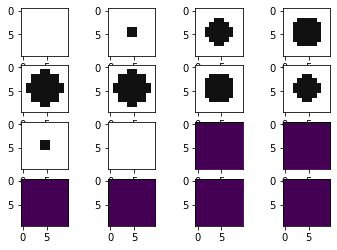

In [4]:
cm = ListedColormap(np.array(m.palette, dtype='f') / 256)

f, arr = plt.subplots(s,s)

for i, slc in enumerate(img):
    arr[i//s, i%s].imshow(img[i], cmap=cm)
for a in range(i+1, s*s):
    arr[a//s, a%s].imshow(np.zeros(img.shape[1:3]))

plt.show()

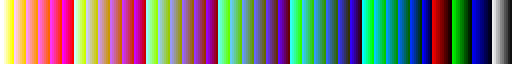

In [5]:
cm

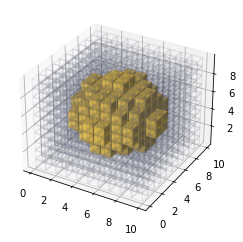

In [6]:
def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

voxels = np.zeros(img.shape, dtype=bool)
voxels[img[:, :, :] > 0] = True

facecolors = np.where(voxels, '#FFD65DC0', '#7A88CC00')
edgecolors = np.where(voxels, '#BFAB6E10', '#7D84A610')
filled = np.ones(voxels.shape)

# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)

plt.show()


In [7]:
size=15j

a=np.mgrid[1:255:size, 1:255:size, 1:255:size].T.astype('B')

size=int(size.imag)

# clear alternate rows/cols
# in the least numpy way possible
for x in range(1, size, 2):
    a[x] = 0
    a[:,x] = 0
    a[:,:,x] = 0

vox = Vox.from_dense(a)

VoxWriter('test02.vox', vox).write()

a

array([[[[  1,   1,   1],
         [  0,   0,   0],
         [ 37,   1,   1],
         ...,
         [218,   1,   1],
         [  0,   0,   0],
         [255,   1,   1]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  1,  37,   1],
         [  0,   0,   0],
         [ 37,  37,   1],
         ...,
         [218,  37,   1],
         [  0,   0,   0],
         [255,  37,   1]],

        ...,

        [[  1, 218,   1],
         [  0,   0,   0],
         [ 37, 218,   1],
         ...,
         [218, 218,   1],
         [  0,   0,   0],
         [255, 218,   1]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  1, 255,   1],
         [  0,   0,   0],
         [ 37, 255,   1],
         ...,
         [218, 255,   1],
        

In [8]:
m = VoxParser('test02.vox').parse()

img = m.to_dense()

s = math.ceil(math.sqrt(img.shape[0]))
print('size:', img.shape, s)

print('palette size:', len(m.palette))

img

size: (15, 15, 15) 4
palette size: 256


array([[[255,   0, 253, ..., 193,   0, 192],
        [  0,   0,   0, ...,   0,   0,   0],
        [243,   0, 240, ..., 179,   0, 178],
        ...,
        [ 82,   0,  80, ...,  22,   0,  20],
        [  0,   0,   0, ...,   0,   0,   0],
        [ 77,   0,  76, ...,  19,   0,  17]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[254,   0, 253, ..., 193,   0, 191],
        [  0,   0,   0, ...,   0,   0,   0],
        [242,   0, 239, ..., 179,   0, 177],
        ...,
        [ 81,   0,  80, ...,  21,   0,  20],
        [  0,   0,   0, ...,   0,   0,   0],
        [ 77,   0,  76, ...,  18,   0,  16]],

       ...,

       [[248,   0, 245, ..., 185,   0, 183],
        [  0,   0,   0, ...,   0,   0,   0],
        [231,   0, 225, ..., 165,   0, 164

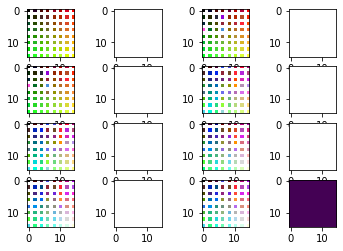

In [9]:
cm = ListedColormap(np.array(m.palette, dtype='f') / 256)

f, arr = plt.subplots(s,s)

for i, slc in enumerate(img):
    arr[i//s, i%s].imshow(img[i], cmap=cm)
for a in range(i+1, s*s):
    arr[a//s, a%s].imshow(np.zeros(img.shape[1:3]))

plt.show()

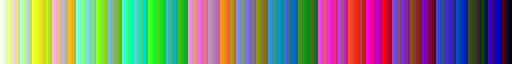

In [10]:
cm

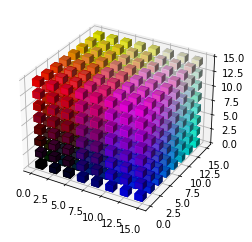

In [11]:
m = VoxParser('test02.vox').parse()
#img = m.to_dense()

voxels = np.zeros(img.shape, dtype=bool)
#voxels[img[:, :, :] > 0] = True

colors = np.zeros(voxels.shape + (4,))
#colors[..., 0] = 0.0
#colors[..., 1] = 0.0
#colors[..., 2] = 0.0
#colors[..., 3] = 1.0

sz = m.models[0].size
for v in m.models[0].voxels:
    col = m.palette[v.c]
    voxels[v.y, sz.z - v.z - 1, v.x] = bool(v.c)
#    colors[v.y, sz.z - v.z - 1, v.x] = (v.x/sz.x, v.y/sz.y, v.z/sz.z, 1.0)
    colors[v.y, sz.z - v.z - 1, v.x] = (col.r/255., col.g/255., col.b/255., col.a/255.)

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxels,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)

plt.show()


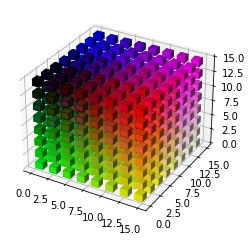

In [12]:
m = VoxParser('test02.vox').parse()
voxels = np.zeros(img.shape, dtype=bool)
colors = np.zeros(voxels.shape + (4,))

sz = m.models[0].size
for v in m.models[0].voxels:
    col = m.palette[v.c]
    voxels[v.x, v.y, v.z] = bool(v.c)
    colors[v.x, v.y, v.z] = (col.r/255., col.g/255., col.b/255., col.a/255.)

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxels,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)

plt.show()

size (15, 15, 15, 4) 4


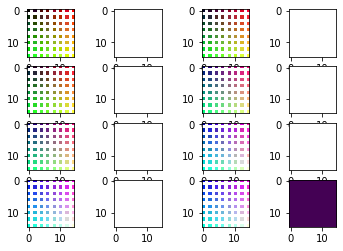

In [13]:
m = VoxParser('test02.vox').parse()

img = m.to_dense_rgba()

import matplotlib.pyplot as plt
import numpy as np

s = math.ceil(math.sqrt(img.shape[0]))
print('size', img.shape, s)
f, arr = plt.subplots(s,s)
for i, slc in enumerate(img):
    arr[i//s, i%s].imshow(img[i])
for a in range(i+1, s*s):
    arr[a//s, a%s].imshow(np.zeros(img.shape[1:3]))

plt.show()
